# TIMIT

Converted dataset into WAVE From NIST and preprocessing structure of dataset done

PENDING:
- Monoaudio to 2 channels for multi microphone
- apply a linear filter, band-pass filter
- Pyroomacoustics library can help add NOISE with room impulse responses (RIRs)

In [1]:
import wave
import os
import numpy as np
import pandas as pd
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
import sounddevice as sd
import pyroomacoustics as pra
from pydub import AudioSegment

C:\Users\nikhi\AppData\Local\Temp\ipykernel_18056\3920150561.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
C:\Users\nikhi\AppData\Local\Programs\Python\Python310\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


### Day 1

In [10]:
os.listdir(PATH+regions[0] + "/FCJF0")

['SA1.PHN',
 'SA1.TXT',
 'SA1.WAV',
 'SA1.WRD',
 'SA2.PHN',
 'SA2.TXT',
 'SA2.WAV',
 'SA2.WRD',
 'SI1027.PHN',
 'SI1027.TXT',
 'SI1027.WAV',
 'SI1027.WRD',
 'SI1657.PHN',
 'SI1657.TXT',
 'SI1657.WAV',
 'SI1657.WRD',
 'SI648.PHN',
 'SI648.TXT',
 'SI648.WAV',
 'SI648.WRD',
 'SX127.PHN',
 'SX127.TXT',
 'SX127.WAV',
 'SX127.WRD',
 'SX217.PHN',
 'SX217.TXT',
 'SX217.WAV',
 'SX217.WRD',
 'SX307.PHN',
 'SX307.TXT',
 'SX307.WAV',
 'SX307.WRD',
 'SX37.PHN',
 'SX37.TXT',
 'SX37.WAV',
 'SX37.WRD',
 'SX397.PHN',
 'SX397.TXT',
 'SX397.WAV',
 'SX397.WRD']

In [3]:
PATH = "E:/ML/Datasets/TIMIT/data/lisa/data/timit/raw/TIMIT/TRAIN/"
regions = ['DR1', 'DR2', 'DR3', 'DR4', 'DR5', 'DR6', 'DR7', 'DR8']

In [33]:
wavfile

'E:/ML/Datasets/TIMIT/data/lisa/data/timit/raw/TIMIT/TRAIN/DR1/FCJF0/SA1.WAV'

In [13]:
with open("E:/ML/Datasets/TIMIT/data/lisa/data/timit/raw/TIMIT/TRAIN/DR1/FCJF0/SI1657.WAV", 'rb') as f:
    data = f.readlines()
print(len(data), data)

290 [b'NIST_1A\n', b'   1024\n', b'database_id -s5 TIMIT\n', b'database_version -s3 1.0\n', b'utterance_id -s11 cjf0_si1657\n', b'channel_count -i 1\n', b'sample_count -i 45466\n', b'sample_rate -i 16000\n', b'sample_min -i -1681\n', b'sample_max -i 2612\n', b'sample_n_bytes -i 2\n', b'sample_byte_format -s2 01\n', b'sample_sig_bits -i 16\n', b'end_head\n', b'\n', b'\n', b'\n', b'\n', b'                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [19]:
import numpy as np
from scipy.io.wavfile import write
import struct

def read_nist_wav(file_path):
    with open(file_path, 'rb') as file:
        header = file.read(1024) # 1024 bits header 

        header_lines = header.decode('utf-8').splitlines()

        
        sample_rate = None
        sample_count = None
        sample_size = None
        num_channels = None
        for line in header_lines:
            if 'sample_rate' in line:
                sample_rate = int(line.split()[2])
            elif 'sample_count' in line:
                sample_count = int(line.split()[2])
            elif 'sample_n_bytes' in line:
                sample_size = int(line.split()[2])
            elif 'channel_count' in line:
                num_channels = int(line.split()[2])

        if not sample_rate or not sample_count or not sample_size or not num_channels:
            raise ValueError("Missing necessary metadata in the NIST header.")

        audio_data = file.read()
        dtype = np.int16 if sample_size == 2 else np.int8
        audio_array = np.frombuffer(audio_data, dtype=dtype)

        audio_array = audio_array.reshape((-1, num_channels))

        return audio_array, sample_rate, sample_count, num_channels



audio_array, sample_rate, sample_count, num_channels = read_nist_wav(wavfile)

# print(f"Audio Type: {audio_array.dtype}")
# print(f"Sample Rate: {sample_rate}")
# print(f"Number of Samples: {sample_count}")
# print(f"Number of Channels: {num_channels}")


In [20]:


def convert_nist_to_wav(audio_array, sample_rate, file_path):
    if audio_array.dtype != np.int16:
        audio_array = np.int16(audio_array)

    # Write the audio array to a WAV file using scipy.io.wavfile.write
    write(file_path, sample_rate, audio_array)

    print(f"File saved to {file_path}")


# output_file_path = './output_audio.wav'
# convert_nist_to_wav(audio_array, sample_rate, output_file_path)


In [22]:
def NIST_to_WAV(path, output_path):
    audio_array, sample_rate, sample_count, num_channels = read_nist_wav(path)
    convert_nist_to_wav(audio_array, sample_rate, output_path)
NIST_to_WAV("E:/ML/Datasets/TIMIT/data/lisa/data/timit/raw/TIMIT/TRAIN/DR4/FBAS0/SA1.WAV", "./output.wav")

File saved to ./output.wav


In [27]:
count = 0
for root, _, files in os.walk(r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN"):
    for file in files:
        if not file.lower().endswith('.wav'):
            file_path = os.path.join(root, file)
            os.remove(file_path)
            print(f"Removed: {file}")
            count += 1
print(f"Total number of files removed: {count}")

Removed: SA1.PHN
Removed: SA1.TXT
Removed: SA1.WRD
Removed: SA2.PHN
Removed: SA2.TXT
Removed: SA2.WRD
Removed: SI1027.PHN
Removed: SI1027.TXT
Removed: SI1027.WRD
Removed: SI1657.PHN
Removed: SI1657.TXT
Removed: SI1657.WRD
Removed: SI648.PHN
Removed: SI648.TXT
Removed: SI648.WRD
Removed: SX127.PHN
Removed: SX127.TXT
Removed: SX127.WRD
Removed: SX217.PHN
Removed: SX217.TXT
Removed: SX217.WRD
Removed: SX307.PHN
Removed: SX307.TXT
Removed: SX307.WRD
Removed: SX37.PHN
Removed: SX37.TXT
Removed: SX37.WRD
Removed: SX397.PHN
Removed: SX397.TXT
Removed: SX397.WRD
Removed: SA1.PHN
Removed: SA1.TXT
Removed: SA1.WRD
Removed: SA2.PHN
Removed: SA2.TXT
Removed: SA2.WRD
Removed: SI1271.PHN
Removed: SI1271.TXT
Removed: SI1271.WRD
Removed: SI1406.PHN
Removed: SI1406.TXT
Removed: SI1406.WRD
Removed: SI2036.PHN
Removed: SI2036.TXT
Removed: SI2036.WRD
Removed: SX146.PHN
Removed: SX146.TXT
Removed: SX146.WRD
Removed: SX236.PHN
Removed: SX236.TXT
Removed: SX236.WRD
Removed: SX326.PHN
Removed: SX326.TXT
Remov

In [29]:
count = 0
for root, dirs, files in os.walk(r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN"):
    print(files)
    for file in files:
        count += 1
print(f"Total number of files: {count}")

[]
[]
['SA1.WAV', 'SA2.WAV', 'SI1027.WAV', 'SI1657.WAV', 'SI648.WAV', 'SX127.WAV', 'SX217.WAV', 'SX307.WAV', 'SX37.WAV', 'SX397.WAV']
['SA1.WAV', 'SA2.WAV', 'SI1271.WAV', 'SI1406.WAV', 'SI2036.WAV', 'SX146.WAV', 'SX236.WAV', 'SX326.WAV', 'SX416.WAV', 'SX56.WAV']
['SA1.WAV', 'SA2.WAV', 'SI1149.WAV', 'SI1779.WAV', 'SI2075.WAV', 'SX159.WAV', 'SX249.WAV', 'SX339.WAV', 'SX429.WAV', 'SX69.WAV']
['SA1.WAV', 'SA2.WAV', 'SI1418.WAV', 'SI2048.WAV', 'SI788.WAV', 'SX158.WAV', 'SX248.WAV', 'SX338.WAV', 'SX428.WAV', 'SX68.WAV']
['SA1.WAV', 'SA2.WAV', 'SI1148.WAV', 'SI1778.WAV', 'SI518.WAV', 'SX158.WAV', 'SX248.WAV', 'SX338.WAV', 'SX428.WAV', 'SX68.WAV']
['SA1.WAV', 'SA2.WAV', 'SI1434.WAV', 'SI1763.WAV', 'SI804.WAV', 'SX174.WAV', 'SX264.WAV', 'SX354.WAV', 'SX444.WAV', 'SX84.WAV']
['SA1.WAV', 'SA2.WAV', 'SI1608.WAV', 'SI2238.WAV', 'SI978.WAV', 'SX168.WAV', 'SX258.WAV', 'SX348.WAV', 'SX438.WAV', 'SX78.WAV']
['SA1.WAV', 'SA2.WAV', 'SI1377.WAV', 'SI2007.WAV', 'SI747.WAV', 'SX117.WAV', 'SX207.WAV', 'SX297

In [30]:
remain = 0 # remaining files
count = 0
for root, _, files in os.walk(r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TEST"):
    for file in files:
        if not file.lower().endswith('.wav'):
            file_path = os.path.join(root, file)
            os.remove(file_path)
            count += 1
        else:
            remain += 1
print(f"Total number of files removed: {count}, files remaining: {remain}")

Total number of files removed: 5040, files remaining: 1680


In [36]:
count = 0
for root, dirs, files in os.walk(r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TEST"):
    for file in files:
        count += 1
        file_path = os.path.join(root,file)
        NIST_to_WAV(file_path, file_path)
        if (count % 100 == 0):
            print(count)

File saved to C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TEST\DR1\FAKS0\SA1.WAV
File saved to C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TEST\DR1\FAKS0\SA2.WAV
File saved to C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TEST\DR1\FAKS0\SI1573.WAV
File saved to C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TEST\DR1\FAKS0\SI2203.WAV
File saved to C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TEST\DR1\FAKS0\SI943.WAV
File saved to C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TEST\DR1\FAKS0\SX133.WAV
File saved to C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TEST\DR1\FAKS0\SX223.WAV
File saved to C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TEST\DR1\FAKS0\SX313.WAV
File saved to C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TEST\DR1\FAKS0\SX403.WAV
File saved to C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TEST\DR1\FAKS0\SX43.WAV
File saved to C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TEST\DR1\FDAC1\SA1.WAV
File saved to C:\Users\nikhi\Desktop\

### Day 2

In [2]:
wavefile = r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR1\FCJF0\SA1.WAV"

In [3]:
fs_near, near_end_signal = wav.read(wavefile)
fs_near

16000

In [4]:
# Generate far-end noise signals
duration_seconds = len(near_end_signal) / fs_near  # Match the duration of the near-end signal
far_end_noise1 = np.random.normal(0, 1, int(fs_near * duration_seconds))  # White noise
far_end_noise2 = np.random.normal(0, 1, int(fs_near * duration_seconds))  # White noise
duration_seconds

2.9248125

In [5]:
room_dim = [10, 7, 3] # L x W x H

room = pra.ShoeBox(
    room_dim,
    fs=fs_near,                # Sample freq
    max_order=3,          # Maximum reflection order
    absorption=0.2        # Wall absorption coeff
)

In [6]:
# Add far-end noise sources
far_source1_location = [1, 1, 1.5]  # (x, y, z)
far_source2_location = [8, 6, 2]    # (x, y, z)
room.add_source(far_source1_location, signal=far_end_noise1)
room.add_source(far_source2_location, signal=far_end_noise2)

# Add near-end source
near_source_location = [3, 3, 1.5]  # (x, y, z)
room.add_source(near_source_location, signal=near_end_signal)

In [7]:
mic_location = np.array([[5, 5, 1.5]]).T  # Mic 1 at 5,5,1.5
room.add_microphone_array(mic_location)

In [8]:
room.simulate()

In [9]:
mic_signals = room.mic_array.signals[0] # mixed signals in Mic 1

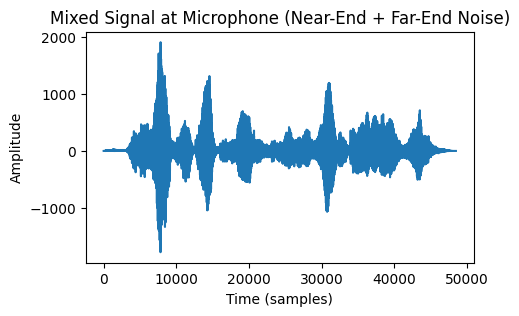

In [10]:
plt.figure(figsize=(5, 3))
plt.plot(mic_signals)
plt.title("Mixed Signal at Microphone (Near-End + Far-End Noise)")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.show()

# import scipy.io.wavfile as wav
# wav.write("echoed_signal.wav", 16000, mic_signals[0].astype(np.int16))

In [11]:
def play_raw_signal(signal, description, sample_rate=16000):
    print(f"Playing: {description}")
    # Normalize signal to -1.0 to 1.0 range
    if np.max(np.abs(signal)) > 1.0:
        signal = signal / np.max(np.abs(signal))
    # Play the signal directly
    sd.play(signal, samplerate=sample_rate)
    sd.wait()  # Wait until playback is finished
    print(f"Finished: {description}\n")


In [13]:
play_raw_signal(far_end_noise1, "Far-End Noise 1")
play_raw_signal(far_end_noise2, "Far-End Noise 2")
play_raw_signal(near_end_signal, "Near-End Signal")
play_raw_signal(mic_signals, "Mixed Signal Mic 1")

Playing: Far-End Noise 1
Finished: Far-End Noise 1

Playing: Far-End Noise 2
Finished: Far-End Noise 2

Playing: Near-End Signal
Finished: Near-End Signal

Playing: Mixed Signal Mic 1
Finished: Mixed Signal Mic 1



### Day 3

In [66]:
path = "C:/Users/nikhi/Desktop/Project 2/code/data/TIMIT/TRAIN/DR8"

In [21]:
files = os.listdir(path+"/"+speakers[0])
files

['SA1.WAV',
 'SA2.WAV',
 'SI1027.WAV',
 'SI1657.WAV',
 'SI648.WAV',
 'SX127.WAV',
 'SX217.WAV',
 'SX307.WAV',
 'SX37.WAV',
 'SX397.WAV']

In [26]:
os.path.basename(path.rstrip(os.sep))

'DR1'

In [51]:
def merge_wav_files(directory):
    parent_dir_name = os.path.basename(directory.rstrip(os.sep))
    current_folder_name = os.path.basename(directory.rstrip(os.sep))
    
    # Initialize an empty AudioSegment
    combined_audio = AudioSegment.empty()
    
    wav_files = [f for f in os.listdir(directory) if f.endswith(".WAV")]
    wav_files.sort()
    
    # Load and append each WAV file
    for wav_file in wav_files:
        file_path = os.path.join(directory, wav_file)
        audio = AudioSegment.from_file(file_path, format="wav")
        combined_audio += audio  # Append to the combined audio

    
    # Save the merged audio with the parent directory name
    output_file = directory+".wav"
    #print(output_file)
    combined_audio.export(output_file, format="wav")
    print(f"Merged WAV file saved as: {output_file}")

    # Delete the original WAV files
    for wav_file in wav_files:
        file_path = os.path.join(directory, wav_file)
        os.remove(file_path)


In [67]:
speakers = os.listdir(path)
for speaker in speakers:
    input_directory = path+"/"+speaker
    
    merge_wav_files(input_directory)
    

Merged WAV file saved as: C:/Users/nikhi/Desktop/Project 2/code/data/TIMIT/TRAIN/DR8/FBCG1.wav
Merged WAV file saved as: C:/Users/nikhi/Desktop/Project 2/code/data/TIMIT/TRAIN/DR8/FCEG0.wav
Merged WAV file saved as: C:/Users/nikhi/Desktop/Project 2/code/data/TIMIT/TRAIN/DR8/FCLT0.wav
Merged WAV file saved as: C:/Users/nikhi/Desktop/Project 2/code/data/TIMIT/TRAIN/DR8/FJRB0.wav
Merged WAV file saved as: C:/Users/nikhi/Desktop/Project 2/code/data/TIMIT/TRAIN/DR8/FKLH0.wav
Merged WAV file saved as: C:/Users/nikhi/Desktop/Project 2/code/data/TIMIT/TRAIN/DR8/FMBG0.wav
Merged WAV file saved as: C:/Users/nikhi/Desktop/Project 2/code/data/TIMIT/TRAIN/DR8/FNKL0.wav
Merged WAV file saved as: C:/Users/nikhi/Desktop/Project 2/code/data/TIMIT/TRAIN/DR8/FPLS0.wav
Merged WAV file saved as: C:/Users/nikhi/Desktop/Project 2/code/data/TIMIT/TRAIN/DR8/MBCG0.wav
Merged WAV file saved as: C:/Users/nikhi/Desktop/Project 2/code/data/TIMIT/TRAIN/DR8/MBSB0.wav
Merged WAV file saved as: C:/Users/nikhi/Desktop/P

In [3]:
def split_wav_files(input_directory, leftover_directory, clip_duration=6000):
    os.makedirs(leftover_directory, exist_ok=True)
    wave_files = os.listdir(input_directory)
    
    # Process each WAV file in the directory
    for wav_file in wave_files:
        if wav_file.endswith(".wav"):
            file_path = os.path.join(input_directory, wav_file)
            #print(f"Processing: {wav_file}")
            
            audio = AudioSegment.from_file(file_path, format="wav")
            audio_length = len(audio)  # Length in milliseconds
            filename, _ = os.path.splitext(wav_file)
            for i in range(0, audio_length, clip_duration):
                clip = audio[i:i + clip_duration]
                if len(clip) == clip_duration:
                    output_file = os.path.join(input_directory, f"{filename}_{i // clip_duration + 1}.wav")
                else:
                    output_file = os.path.join(leftover_directory, f"{filename}_leftover.wav")
                
                clip.export(output_file, format="wav")
                print(f"Saved: {output_file}")

    

In [4]:
leftover_directory = r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\leftovers"
input_directory = r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR1"
split_wav_files(input_directory, leftover_directory)
input_directory = r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR2"
split_wav_files(input_directory, leftover_directory)
input_directory = r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR3"
split_wav_files(input_directory, leftover_directory)
input_directory = r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR4"
split_wav_files(input_directory, leftover_directory)
input_directory = r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR5"
split_wav_files(input_directory, leftover_directory)
input_directory = r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR6"
split_wav_files(input_directory, leftover_directory)
input_directory = r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR7"
split_wav_files(input_directory, leftover_directory)
input_directory = r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR8"
split_wav_files(input_directory, leftover_directory)

Saved: C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR1\FCJF0_1.wav
Saved: C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR1\FCJF0_2.wav
Saved: C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR1\FCJF0_3.wav
Saved: C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR1\FCJF0_4.wav
Saved: C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\leftovers\FCJF0_leftover.wav
Saved: C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR1\FDAW0_1.wav
Saved: C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR1\FDAW0_2.wav
Saved: C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR1\FDAW0_3.wav
Saved: C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR1\FDAW0_4.wav
Saved: C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR1\FDAW0_5.wav
Saved: C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\leftovers\FDAW0_leftover.wav
Saved: C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR1\FDML0_1.wav
Saved: C:\Users\nikhi\Desktop\Project 

In [5]:
def remove_original_files(input_directory):
    wave_files = os.listdir(input_directory)
    for file in wave_files:
        if ('_' not in file):
            f = os.path.join(input_directory, file)
            os.remove(f)


In [6]:
input_directory = r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR1"
remove_original_files(input_directory)
input_directory = r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR2"
remove_original_files(input_directory)
input_directory = r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR3"
remove_original_files(input_directory)
input_directory = r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR4"
remove_original_files(input_directory)
input_directory = r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR5"
remove_original_files(input_directory)
input_directory = r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR6"
remove_original_files(input_directory)
input_directory = r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR7"
remove_original_files(input_directory)
input_directory = r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR8"
remove_original_files(input_directory)

In [ ]:
# pyroomacoustics below

In [7]:
wavefile1 = r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR1\FCJF0_1.WAV"
wavefile2 = r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR1\FDAW0_1.WAV"
wavefile3 = r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR1\FECD0_1.WAV"

In [8]:
fs_near1, near_end_signal1 = wav.read(wavefile1)
fs_far1, far_end_signal1 = wav.read(wavefile2)
fs_far2, far_end_signal2 = wav.read(wavefile3)
duration_seconds = len(near_end_signal1) / fs_near1  # Match the duration of the near-end signal
fs_near1, duration_seconds

(16000, 6.0)

In [9]:
room_dim = [10, 7, 3] # L x W x H

room = pra.ShoeBox(
    room_dim,
    fs=fs_near1,          # Sample freq
    max_order=3,          # Maximum reflection order
    absorption=0.2        # Wall absorption coeff
)

In [10]:
# Adding source and location
far_source1_location = [1, 1, 1.5]  # (x, y, z)
far_source2_location = [8, 6, 2]
near_source_location = [3, 3, 1.5]

room.add_source(far_source1_location, signal=far_end_signal1)
room.add_source(far_source2_location, signal=far_end_signal2)
room.add_source(near_source_location, signal=near_end_signal1)

In [11]:
mic_location = np.array([[5, 5, 1.5]]).T  # Mic 1 at 5,5,1.5
room.add_microphone_array(mic_location)
room.simulate()
mic_signals = room.mic_array.signals[0] # mixed signals in Mic 1

In [13]:
def play_raw_signal(signal, description, sample_rate=16000):
    print(f"Playing: {description}")
    # Normalize signal to -1.0 to 1.0 range
    if np.max(np.abs(signal)) > 1.0:
        signal = signal / np.max(np.abs(signal))
    # Play the signal directly
    sd.play(signal, samplerate=sample_rate)
    sd.wait()  # Wait until playback is finished
    print(f"Finished: {description}\n")


In [14]:
play_raw_signal(far_end_signal1, "Far-End Noise 1")
play_raw_signal(far_end_signal2, "Far-End Noise 2")
play_raw_signal(near_end_signal1, "Near-End Signal")
play_raw_signal(mic_signals, "Mixed Signal Mic 1")

Playing: Far-End Noise 1
Finished: Far-End Noise 1

Playing: Far-End Noise 2
Finished: Far-End Noise 2

Playing: Near-End Signal
Finished: Near-End Signal

Playing: Mixed Signal Mic 1
Finished: Mixed Signal Mic 1



In [42]:
wav.write("mixed_signal.wav", 16000, mic_signals.astype(np.int16))
wav.write("near_end_signal.wav", 16000, near_end_signal1.astype(np.int16))
wav.write("far_end_signal1.wav", 16000, far_end_signal1.astype(np.int16))
wav.write("far_end_signal2.wav", 16000, far_end_signal2.astype(np.int16))

### Day 4

In [26]:
wavefile1 = r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR1\FCJF0_1.WAV"
wavefile2 = r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR1\FDAW0_1.WAV"
wavefile3 = r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR1\FECD0_1.WAV"

In [27]:
fs_near1, near_end_signal1 = wav.read(wavefile1)
fs_far1, far_end_signal1 = wav.read(wavefile2)
fs_far2, far_end_signal2 = wav.read(wavefile3)
duration_seconds = len(near_end_signal1) / fs_near1  # Match the duration of the near-end signal
fs_near1, duration_seconds

(16000, 6.0)

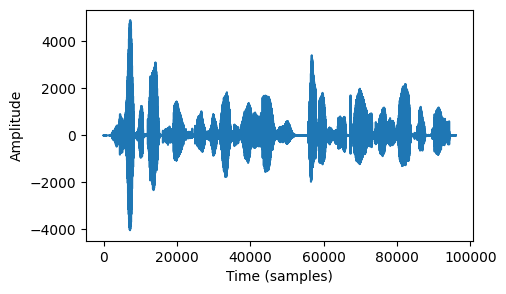

In [4]:
plt.figure(figsize=(5, 3))
plt.plot(far_end_signal1)
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.show()

In [14]:
scaling_factor=0.2
scaled = scale_amplitude(far_end_signal1, scaling_factor)

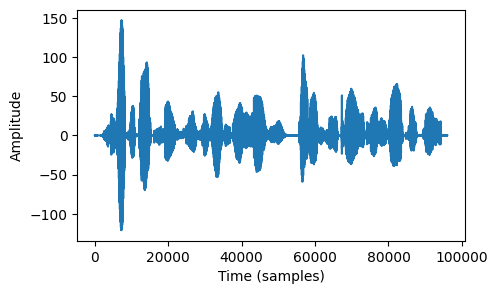

In [12]:
plt.figure(figsize=(5, 3))
plt.plot(scaled)
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.show()

In [28]:
wav.write("scaled2.wav", 16000, scaled.astype(np.int16))

In [29]:
room_dim = [10, 7, 3] # L x W x H

room = pra.ShoeBox(
    room_dim,
    fs=fs_near1,          # Sample freq
    max_order=3,          # Maximum reflection order
    absorption=0.2        # Wall absorption coeff
)

In [30]:
def scale_amplitude(signal, scaling_factor):
    # Scale the signal by the scaling factor
    scaled_signal = signal * scaling_factor
    # Ensure the signal stays within the valid range [-1.0, 1.0]
    return scaled_signal

In [31]:
scaling_factor = 0.4
far_end_signal1 = scale_amplitude(far_end_signal1, scaling_factor)
far_end_signal2 = scale_amplitude(far_end_signal2, scaling_factor)

In [32]:
print(far_end_signal1[:10], far_end_signal2[:10], near_end_signal1[:10])

[ 0.4  1.6  0.4  0.8  1.2  0.   1.6  1.2  0.4 -0.4] [ 1.2  0.4 -0.4 -0.4  1.2  3.6  0.  -1.2  0.4  2.8] [ 1 -1  2  0  0  3  0  1 -3 -2]


In [33]:
# Adding source and location
far_source1_location = [1, 1, 1.5]  # (x, y, z)
far_source2_location = [8, 6, 2]
near_source_location = [3, 3, 1.5]

room.add_source(far_source1_location, signal=far_end_signal1)
room.add_source(far_source2_location, signal=far_end_signal2)
room.add_source(near_source_location, signal=near_end_signal1)

In [34]:
mic_location = np.array([[5, 5, 1.5]]).T  # Mic 1 at 5,5,1.5
room.add_microphone_array(mic_location)
room.simulate()
mic_signals = room.mic_array.signals[0] # mixed signals in Mic 1

In [35]:
def play_raw_signal(signal, description, sample_rate=16000):
    print(f"Playing: {description}")
    # Normalize signal to -1.0 to 1.0 range
    if np.max(np.abs(signal)) > 1.0:
        signal = signal / np.max(np.abs(signal))
    # Play the signal directly
    sd.play(signal, samplerate=sample_rate)
    sd.wait()  # Wait until playback is finished
    print(f"Finished: {description}\n")


In [36]:
play_raw_signal(far_end_signal1, "Far-End Noise 1")
play_raw_signal(far_end_signal2, "Far-End Noise 2")
play_raw_signal(near_end_signal1, "Near-End Signal")
play_raw_signal(mic_signals, "Mixed Signal Mic 1")

Playing: Far-End Noise 1
Finished: Far-End Noise 1

Playing: Far-End Noise 2
Finished: Far-End Noise 2

Playing: Near-End Signal
Finished: Near-End Signal

Playing: Mixed Signal Mic 1
Finished: Mixed Signal Mic 1



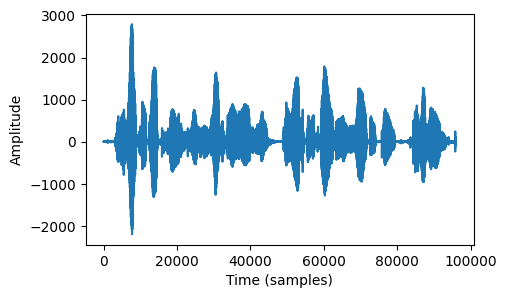

In [37]:
plt.figure(figsize=(5, 3))
plt.plot(near_end_signal1)
# plt.title("Mixed Signal at Microphone (Near-End + Far-End Noise)")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.show()

In [38]:
wav.write("mixed_signal.wav", 16000, mic_signals.astype(np.int16))
wav.write("near_end_signal.wav", 16000, near_end_signal1.astype(np.int16))
wav.write("far_end_signal1.wav", 16000, far_end_signal1.astype(np.int16))
wav.write("far_end_signal2.wav", 16000, far_end_signal2.astype(np.int16))

# Old

In [1]:
import librosa
import numpy as np

In [2]:
def apply_lms_filter(audio_file, filter_length=1024, mu=0.01):

    y, sr = librosa.load(audio_file, sr=None)

    w = np.zeros(filter_length) # Initialize the LMS filter coefficients
    x_buffer = np.zeros(filter_length) # Create a buffer for the input signal
    y_filtered = np.zeros_like(y) # Filtered output signal

    # Apply the LMS filter
    for n in range(filter_length, len(y)):
        x_buffer[:-1] = x_buffer[1:]
        x_buffer[-1] = y[n - filter_length]
        y_hat = np.dot(w, x_buffer) # Calculate the filter output
        e = y[n] - y_hat # Calculate the error
        w = w + mu * e * x_buffer # Update the filter coefficients
        y_filtered[n] = y_hat # Store the filtered output

    return y_filtered

In [6]:
audio_file = "E:/Computer/GitHub/AEC-Challenge/-0AcvGNEdEK-DQGxWmtq2Q_farend_singletalk_lpb.wav" 
y, sr = librosa.load(audio_file, sr=None)
filtered_audio = apply_lms_filter(audio_file)